In [1]:
# Importing required packages
import os # version Python: 3.10.12
import warnings # Standard Library
warnings.filterwarnings("ignore", category=UserWarning)
import numpy as np # version 1.25.2
import pandas as pd # version 2.2.2
import seaborn as sns # version 0.13.2
from faker import Faker # version 26.1.0
import scipy.stats as stats # version 1.9.3
import matplotlib.pyplot as plt # version 1.25.2

In [2]:
# Initialize Faker instance to generate synthetic data
fake = Faker()

# Define the base directory where datasets will be saved
base_path = '/home/joserico/Desktop/Capstone_MScData_Sept23_SB/FLServer/scenarios/technological' # Adjust this path accordignly

# Function to generate IID datasets with normal distribution
# The function creates a dataset with the specified number of rows where the feature values follow a normal distribution
def generate_iid_normal_dataset(num_rows, mean=50, std_dev=10):
    # Generate the target variable with a balanced distribution of classes (0 and 1)
    target_variable = np.random.choice([0, 1], size=num_rows)
    
    # Create feature columns with normally distributed data
    feature_columns = {
        f'Feature_{i}': np.random.normal(loc=mean, scale=std_dev, size=num_rows)
        for i in range(1, 8)  # 7 features named Feature_1 to Feature_7
    }
    
    # Create a DataFrame combining the target variable and feature columns
    df = pd.DataFrame({
        'TargetVariable': target_variable,
        **feature_columns
    })
    return df

# Function to generate non-IID datasets with an imbalance in classes and more variability
# The function uses Faker to introduce variability and generates datasets with a given imbalance ratio
def generate_non_iid_dataset(num_rows, imbalance_ratio=0.7):
    # Calculate the number of instances for each class based on the imbalance ratio
    num_class_0 = int(num_rows * imbalance_ratio)
    num_class_1 = num_rows - num_class_0
    
    # Create a target variable array with the specified imbalance
    target_variable = np.array([0] * num_class_0 + [1] * num_class_1)
    np.random.shuffle(target_variable)  # Shuffle to ensure random distribution
    
    # Create feature columns with variability introduced by Faker
    feature_columns = {
        f'Feature_{i}': [fake.random_number(digits=3) * (1 if i % 2 == 0 else 10) + np.random.rand() for _ in range(num_rows)]
        for i in range(1, 8)
    }
    
    # Create a DataFrame combining the target variable and feature columns
    df = pd.DataFrame({
        'TargetVariable': target_variable,
        **feature_columns
    })
    return df

# Generate and save datasets for each client
# The loop iterates through clients 1 to 5, generating both IID and non-IID datasets
for i in range(1, 6):
    # Generate IID dataset with a fixed number of rows and save it as a CSV file
    df_iid = generate_iid_normal_dataset(5000)
    file_name_iid = f'{base_path}/client{i}/data{i}_iid.csv'
    df_iid.to_csv(file_name_iid, index=False)
    
    # Generate non-IID dataset with a random number of rows and imbalance, and save it as a CSV file
    non_iid_rows = np.random.randint(3000, 7000)  # Random number of rows for variability
    imbalance_ratio = np.random.uniform(0.1, 0.9)  # Random imbalance ratio between 0.1 and 0.9
    df_non_iid = generate_non_iid_dataset(non_iid_rows, imbalance_ratio=imbalance_ratio)
    file_name_non_iid = f'{base_path}/client{i}/data{i}_nonIID.csv'
    df_non_iid.to_csv(file_name_non_iid, index=False)

# Print a message indicating successful generation and saving of datasets
print("IID and non-IID datasets generated and saved successfully!")

IID and non-IID datasets generated and saved successfully!



--- Analyzing Client 1 ---

Analyzing Client1 - IID dataset...


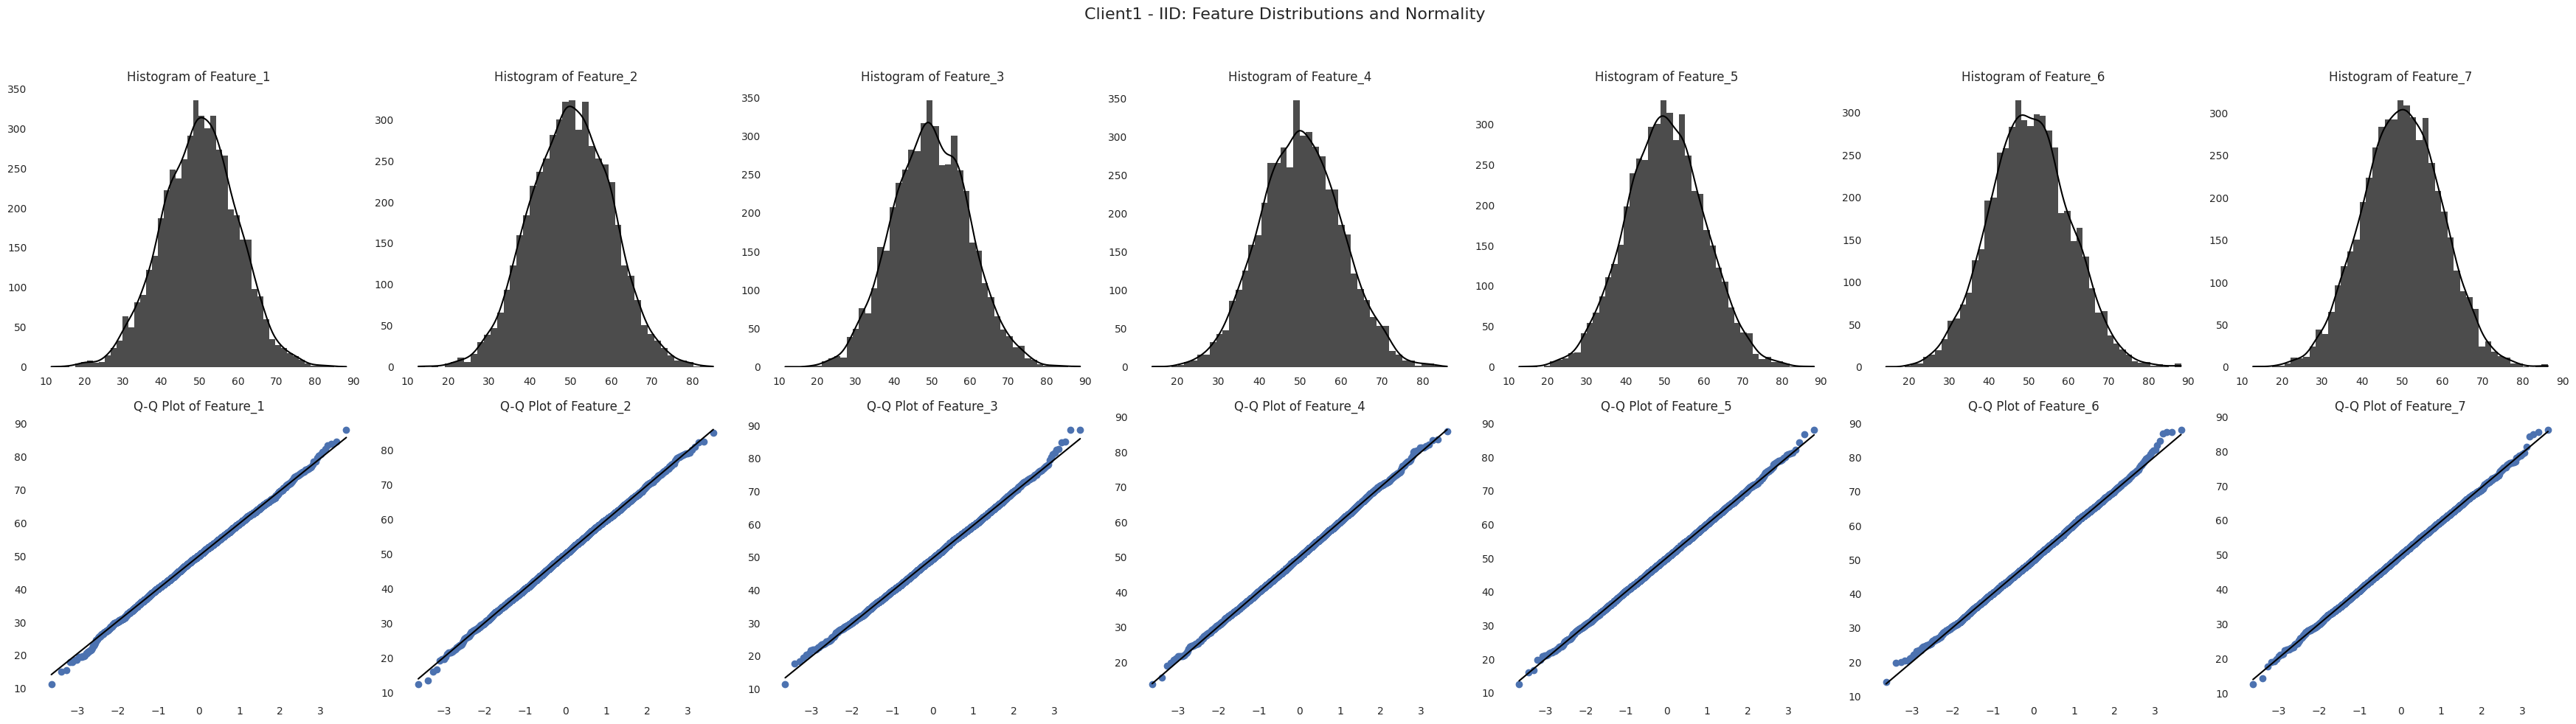

Shapiro-Wilk Test for Feature_1 in Client1 - IID:
Statistic: 0.9994, p-value: 1.3914e-01
Feature_1 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_2 in Client1 - IID:
Statistic: 0.9997, p-value: 5.8448e-01
Feature_2 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_3 in Client1 - IID:
Statistic: 0.9995, p-value: 2.2843e-01
Feature_3 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_4 in Client1 - IID:
Statistic: 0.9996, p-value: 4.8975e-01
Feature_4 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_5 in Client1 - IID:
Statistic: 0.9998, p-value: 9.8337e-01
Feature_5 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_6 in Client1 - IID:
Statistic: 0.9994, p-value: 7.0905e-02
Feature_6 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_7 in Client1 - IID:
Statistic: 0.9998, p-value: 9.1244e-01
Featu

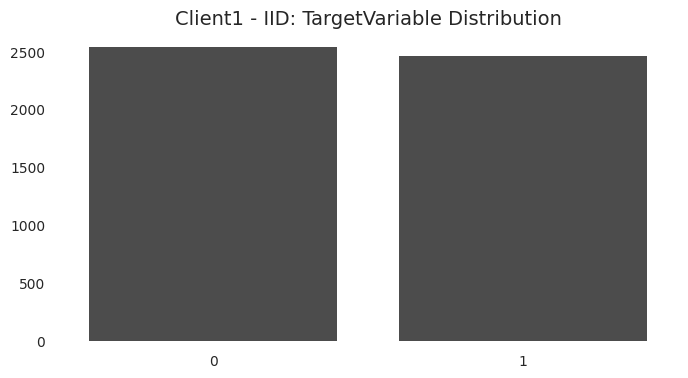

Distribution of TargetVariable in Client1 - IID:
TargetVariable
0    2536
1    2464
Name: count, dtype: int64
Proportion of class 0: 0.51
Proportion of class 1: 0.49


Analyzing Client1 - Non-IID dataset...


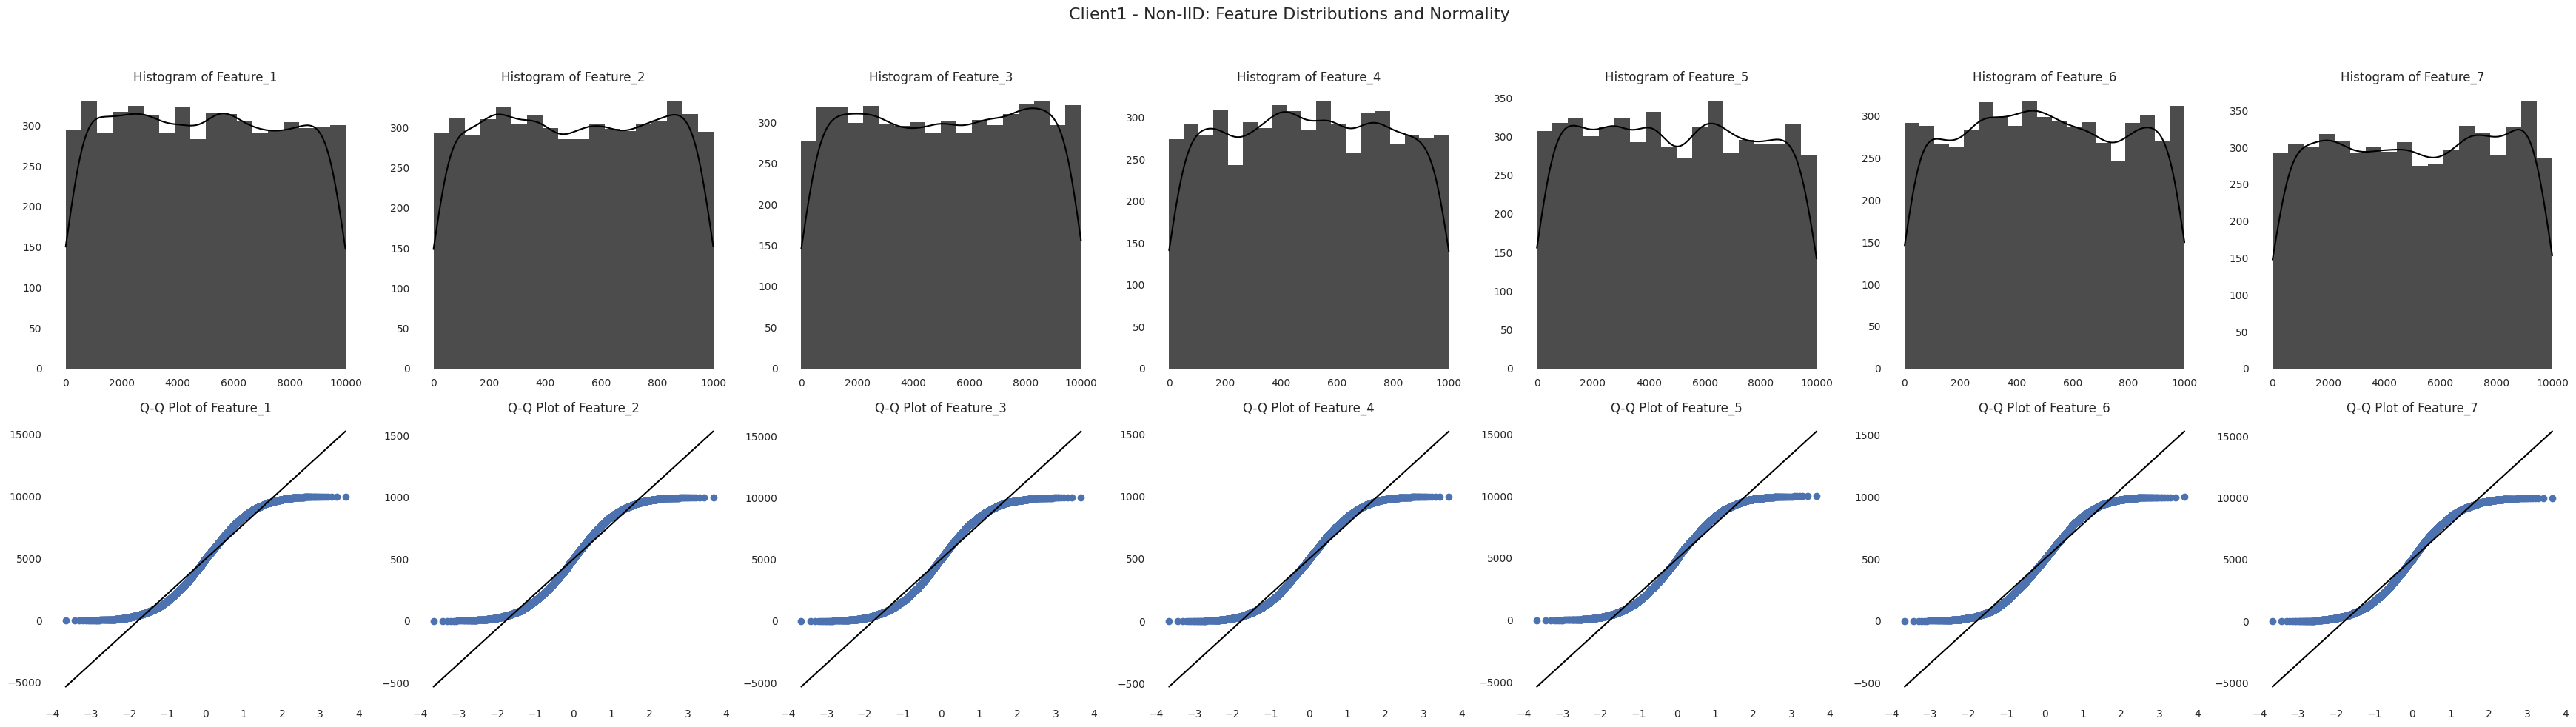

Shapiro-Wilk Test for Feature_1 in Client1 - Non-IID:
Statistic: 0.9547, p-value: 3.3242e-38
Feature_1 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_2 in Client1 - Non-IID:
Statistic: 0.9533, p-value: 1.1482e-38
Feature_2 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_3 in Client1 - Non-IID:
Statistic: 0.9526, p-value: 7.0506e-39
Feature_3 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_4 in Client1 - Non-IID:
Statistic: 0.9576, p-value: 3.2043e-37
Feature_4 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_5 in Client1 - Non-IID:
Statistic: 0.9546, p-value: 3.1698e-38
Feature_5 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_6 in Client1 - Non-IID:
Statistic: 0.9570, p-value: 1.8917e-37
Feature_6 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_7 in Client1 - Non-IID:
Statistic: 0.951

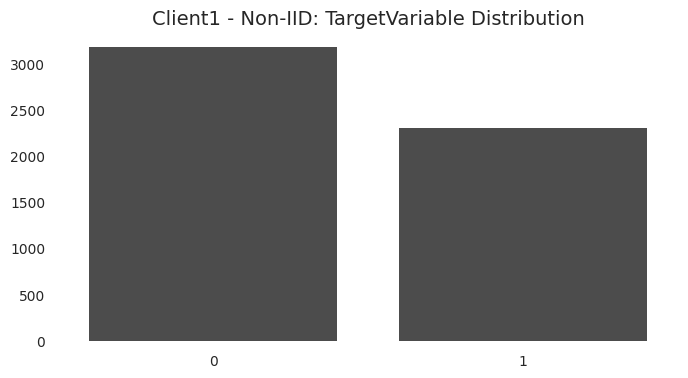

Distribution of TargetVariable in Client1 - Non-IID:
TargetVariable
0    3174
1    2305
Name: count, dtype: int64
Proportion of class 0: 0.58
Proportion of class 1: 0.42



--- Analyzing Client 2 ---

Analyzing Client2 - IID dataset...


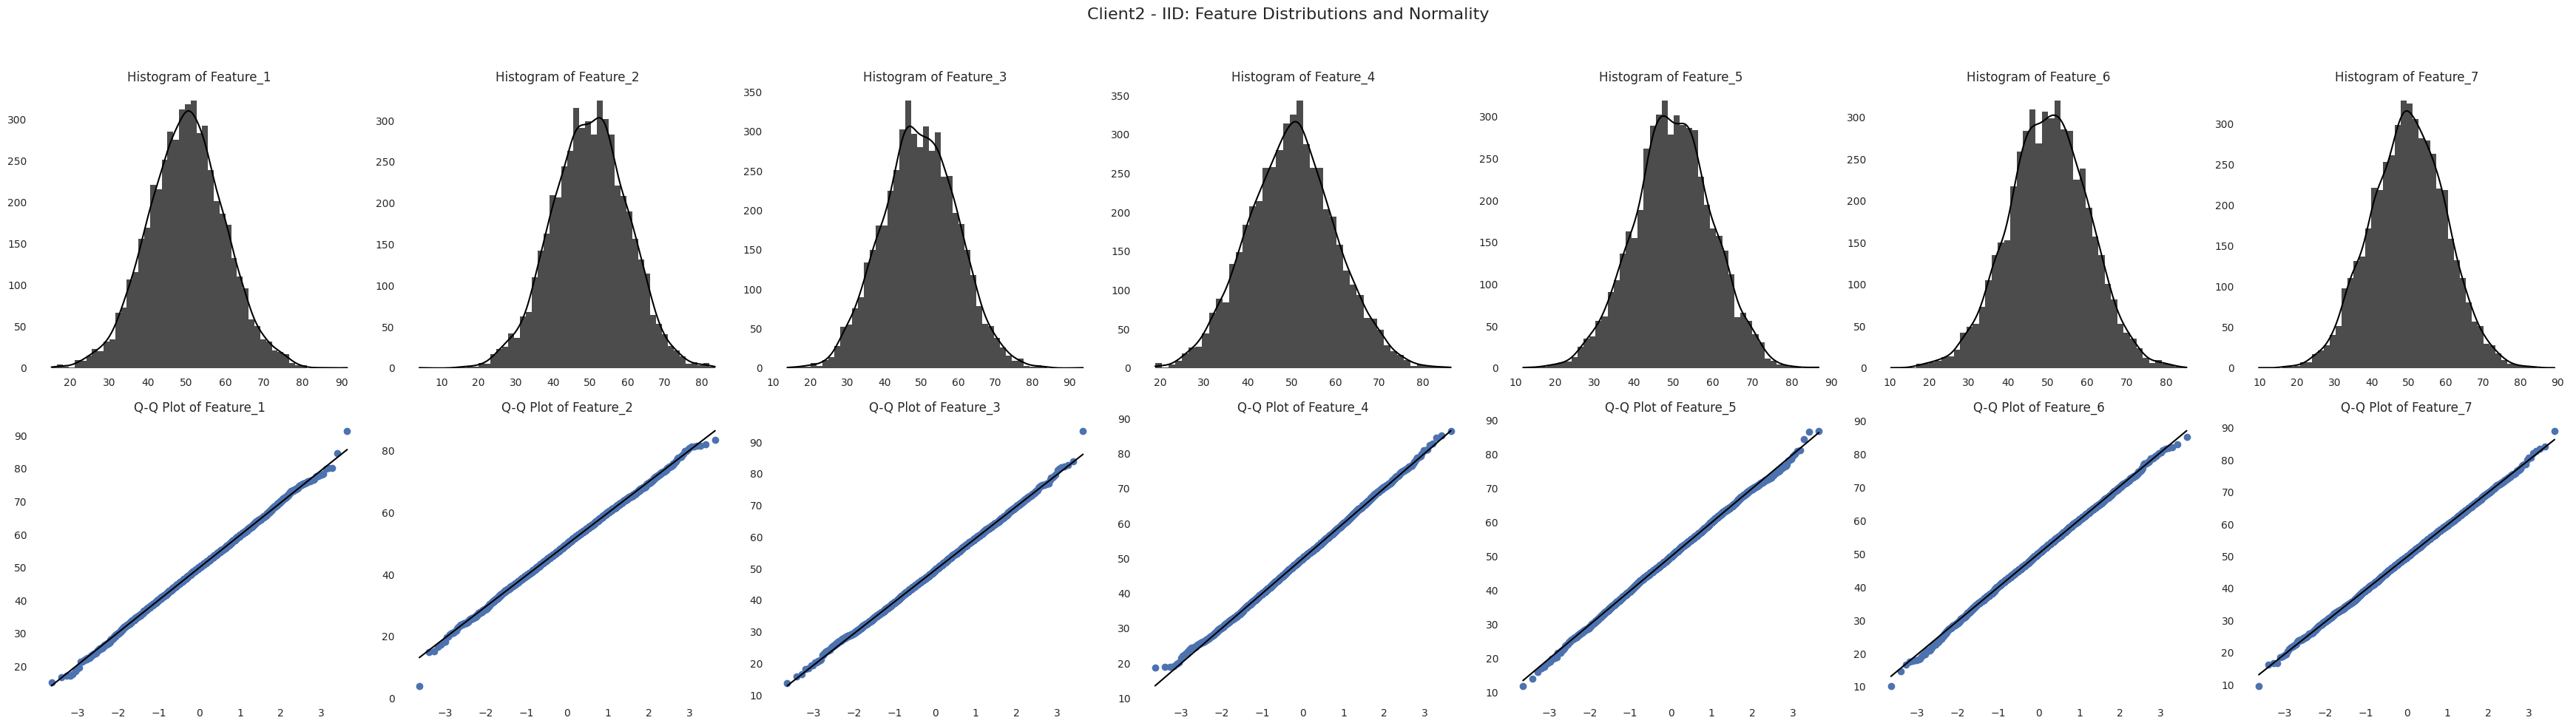

Shapiro-Wilk Test for Feature_1 in Client2 - IID:
Statistic: 0.9996, p-value: 5.2558e-01
Feature_1 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_2 in Client2 - IID:
Statistic: 0.9995, p-value: 2.1965e-01
Feature_2 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_3 in Client2 - IID:
Statistic: 0.9996, p-value: 3.8106e-01
Feature_3 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_4 in Client2 - IID:
Statistic: 0.9995, p-value: 1.5462e-01
Feature_4 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_5 in Client2 - IID:
Statistic: 0.9995, p-value: 1.9651e-01
Feature_5 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_6 in Client2 - IID:
Statistic: 0.9995, p-value: 2.1680e-01
Feature_6 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_7 in Client2 - IID:
Statistic: 0.9997, p-value: 6.8770e-01
Featu

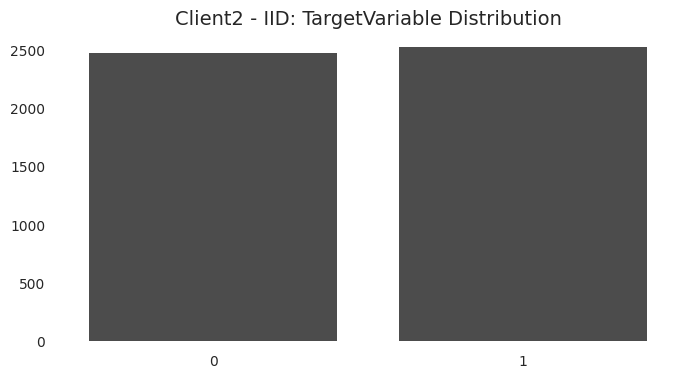

Distribution of TargetVariable in Client2 - IID:
TargetVariable
1    2523
0    2477
Name: count, dtype: int64
Proportion of class 0: 0.50
Proportion of class 1: 0.50


Analyzing Client2 - Non-IID dataset...


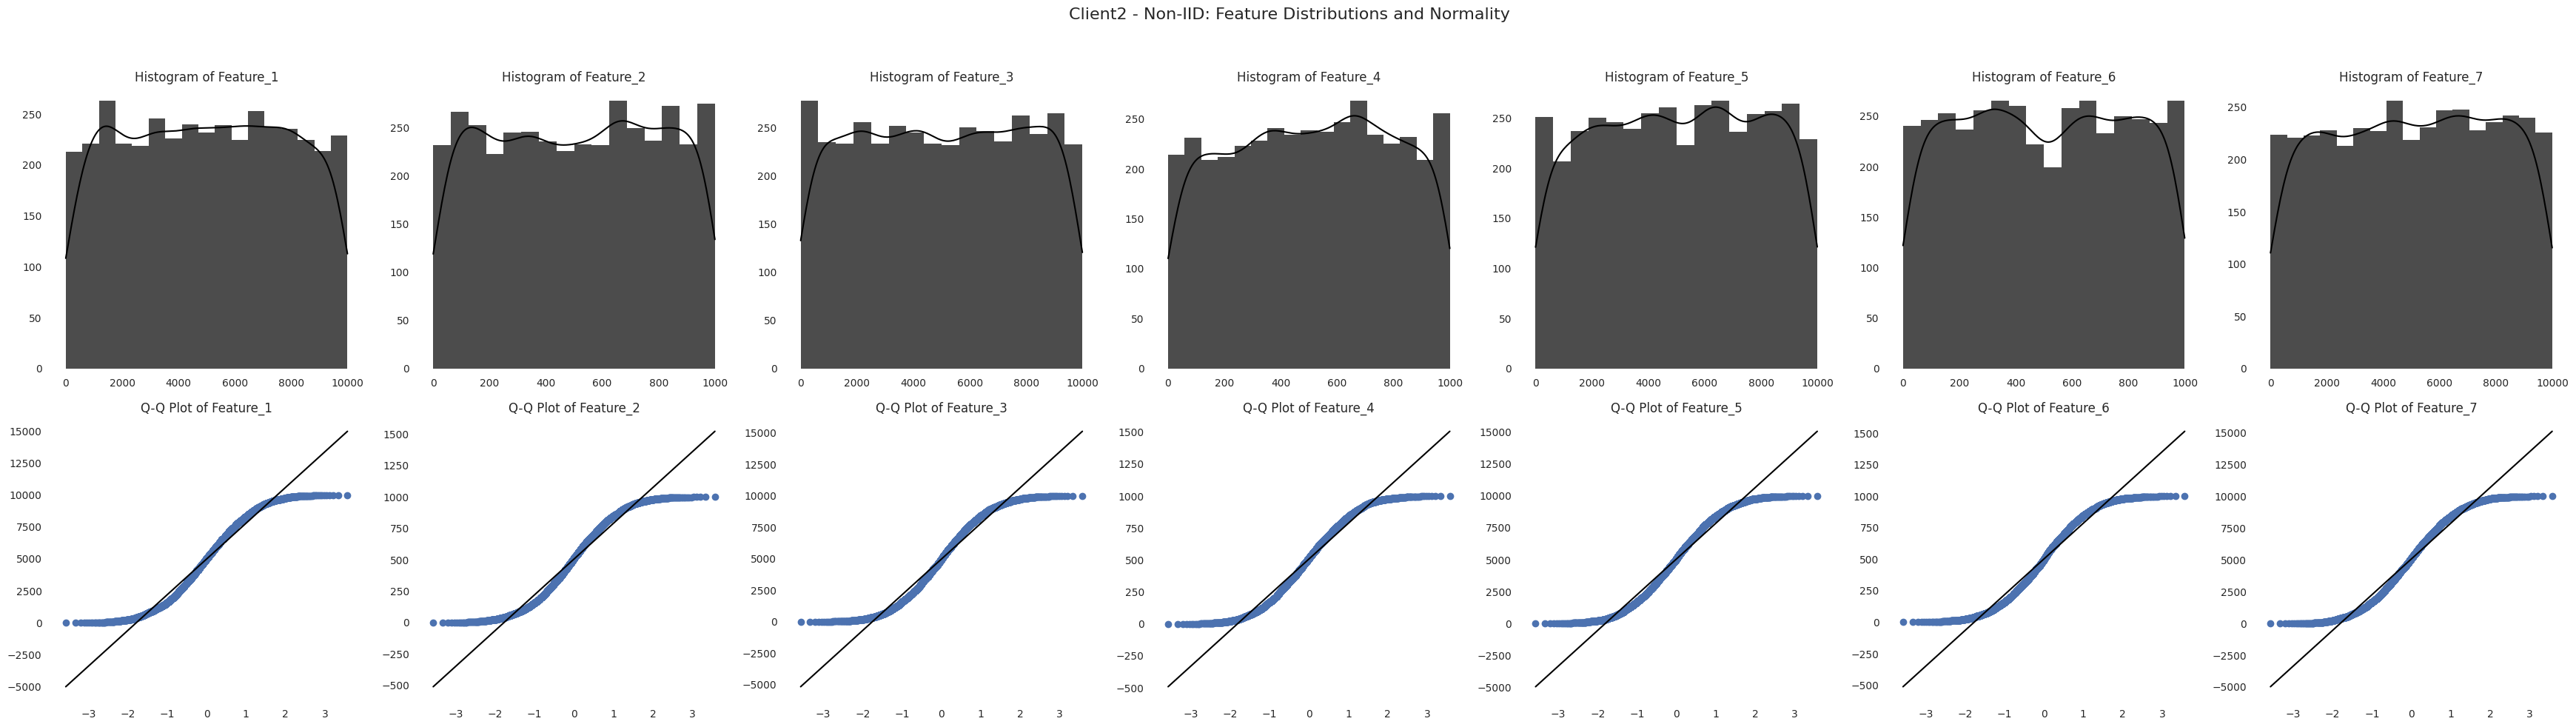

Shapiro-Wilk Test for Feature_1 in Client2 - Non-IID:
Statistic: 0.9569, p-value: 1.2445e-32
Feature_1 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_2 in Client2 - Non-IID:
Statistic: 0.9521, p-value: 4.4772e-34
Feature_2 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_3 in Client2 - Non-IID:
Statistic: 0.9534, p-value: 1.0229e-33
Feature_3 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_4 in Client2 - Non-IID:
Statistic: 0.9588, p-value: 4.9156e-32
Feature_4 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_5 in Client2 - Non-IID:
Statistic: 0.9572, p-value: 1.4652e-32
Feature_5 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_6 in Client2 - Non-IID:
Statistic: 0.9530, p-value: 8.1823e-34
Feature_6 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_7 in Client2 - Non-IID:
Statistic: 0.956

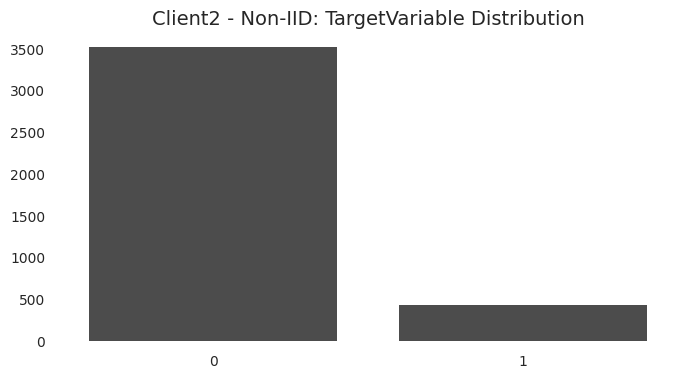

Distribution of TargetVariable in Client2 - Non-IID:
TargetVariable
0    3514
1     425
Name: count, dtype: int64
Proportion of class 0: 0.89
Proportion of class 1: 0.11



--- Analyzing Client 3 ---

Analyzing Client3 - IID dataset...


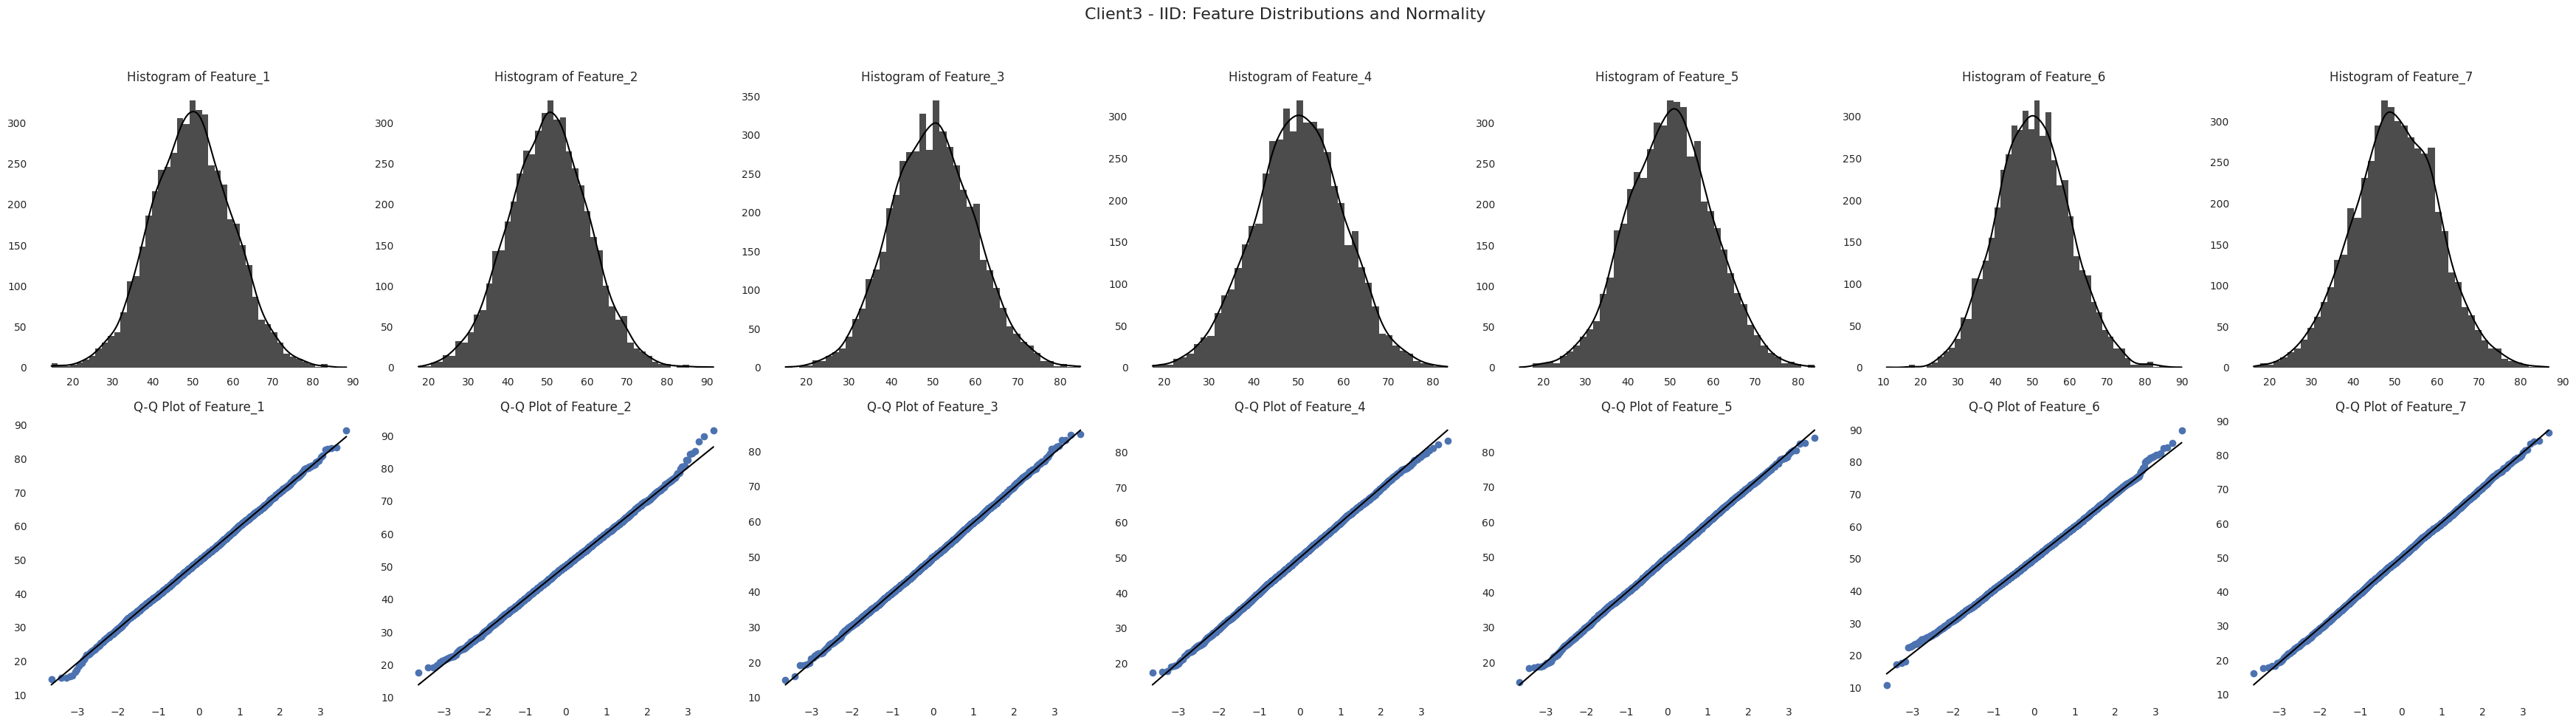

Shapiro-Wilk Test for Feature_1 in Client3 - IID:
Statistic: 0.9997, p-value: 8.1496e-01
Feature_1 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_2 in Client3 - IID:
Statistic: 0.9995, p-value: 2.3422e-01
Feature_2 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_3 in Client3 - IID:
Statistic: 0.9996, p-value: 3.5102e-01
Feature_3 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_4 in Client3 - IID:
Statistic: 0.9996, p-value: 3.7333e-01
Feature_4 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_5 in Client3 - IID:
Statistic: 0.9997, p-value: 7.8619e-01
Feature_5 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_6 in Client3 - IID:
Statistic: 0.9993, p-value: 4.8527e-02
Feature_6 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_7 in Client3 - IID:
Statistic: 0.9996, p-value: 3.9230e-01
Featu

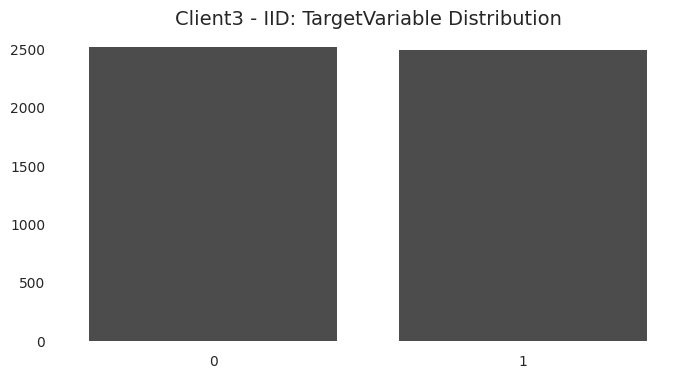

Distribution of TargetVariable in Client3 - IID:
TargetVariable
0    2511
1    2489
Name: count, dtype: int64
Proportion of class 0: 0.50
Proportion of class 1: 0.50


Analyzing Client3 - Non-IID dataset...


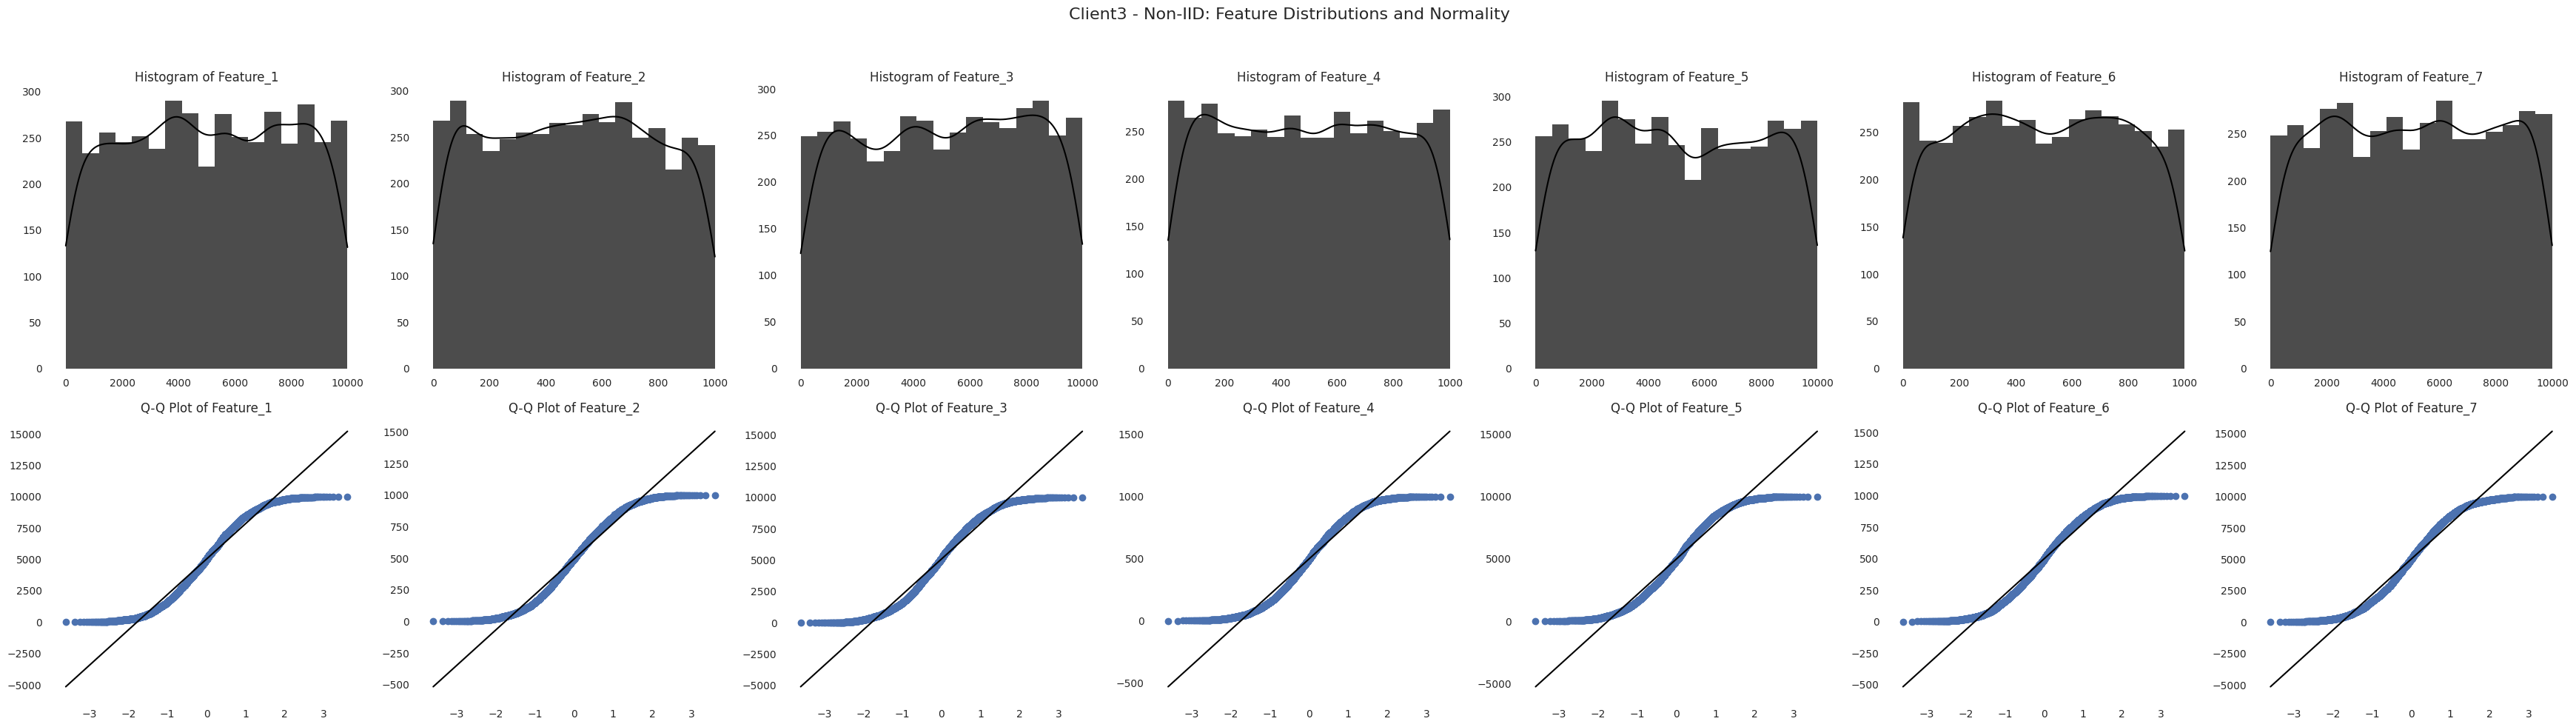

Shapiro-Wilk Test for Feature_1 in Client3 - Non-IID:
Statistic: 0.9553, p-value: 1.2330e-34
Feature_1 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_2 in Client3 - Non-IID:
Statistic: 0.9569, p-value: 3.9551e-34
Feature_2 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_3 in Client3 - Non-IID:
Statistic: 0.9537, p-value: 4.0389e-35
Feature_3 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_4 in Client3 - Non-IID:
Statistic: 0.9525, p-value: 1.6649e-35
Feature_4 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_5 in Client3 - Non-IID:
Statistic: 0.9527, p-value: 1.8977e-35
Feature_5 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_6 in Client3 - Non-IID:
Statistic: 0.9567, p-value: 3.3828e-34
Feature_6 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_7 in Client3 - Non-IID:
Statistic: 0.953

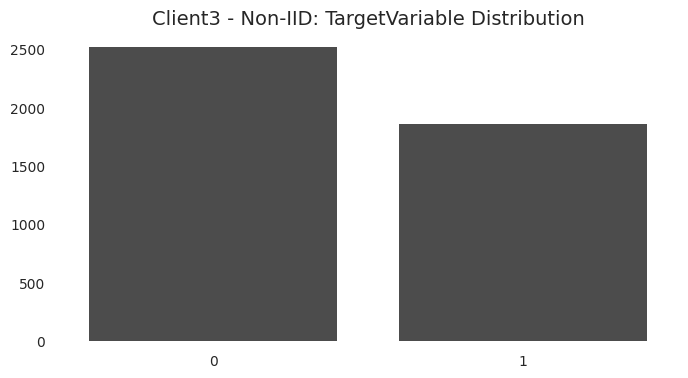

Distribution of TargetVariable in Client3 - Non-IID:
TargetVariable
0    2515
1    1857
Name: count, dtype: int64
Proportion of class 0: 0.58
Proportion of class 1: 0.42



--- Analyzing Client 4 ---

Analyzing Client4 - IID dataset...


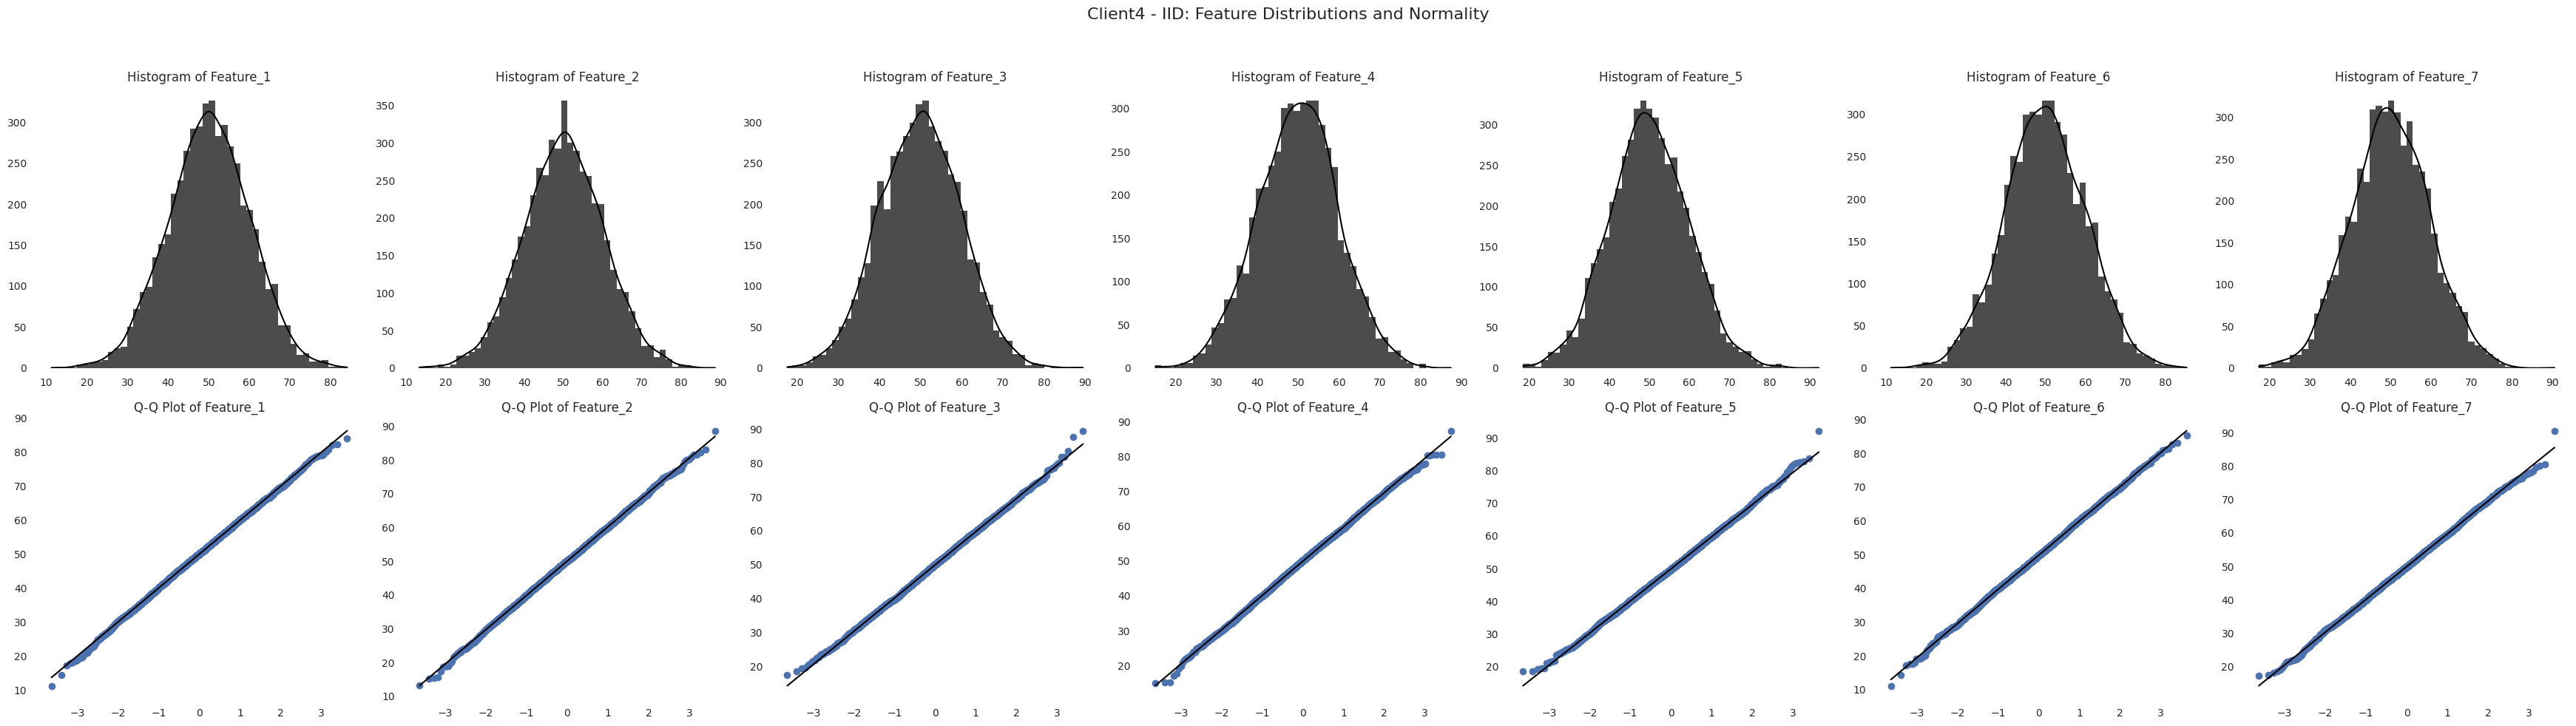

Shapiro-Wilk Test for Feature_1 in Client4 - IID:
Statistic: 0.9996, p-value: 5.4065e-01
Feature_1 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_2 in Client4 - IID:
Statistic: 0.9998, p-value: 9.4859e-01
Feature_2 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_3 in Client4 - IID:
Statistic: 0.9996, p-value: 4.1810e-01
Feature_3 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_4 in Client4 - IID:
Statistic: 0.9995, p-value: 2.9116e-01
Feature_4 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_5 in Client4 - IID:
Statistic: 0.9995, p-value: 2.6201e-01
Feature_5 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_6 in Client4 - IID:
Statistic: 0.9997, p-value: 7.2129e-01
Feature_6 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_7 in Client4 - IID:
Statistic: 0.9996, p-value: 5.0747e-01
Featu

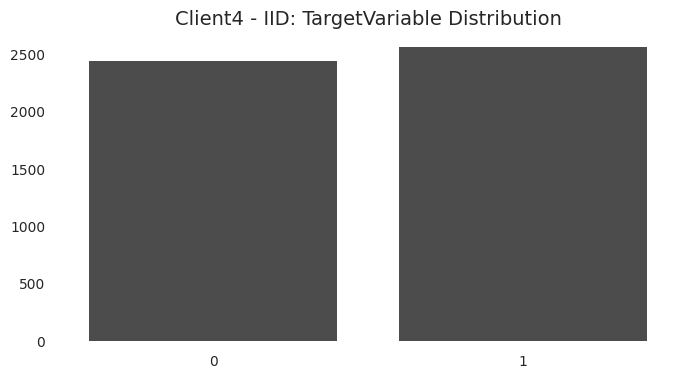

Distribution of TargetVariable in Client4 - IID:
TargetVariable
1    2558
0    2442
Name: count, dtype: int64
Proportion of class 0: 0.49
Proportion of class 1: 0.51


Analyzing Client4 - Non-IID dataset...


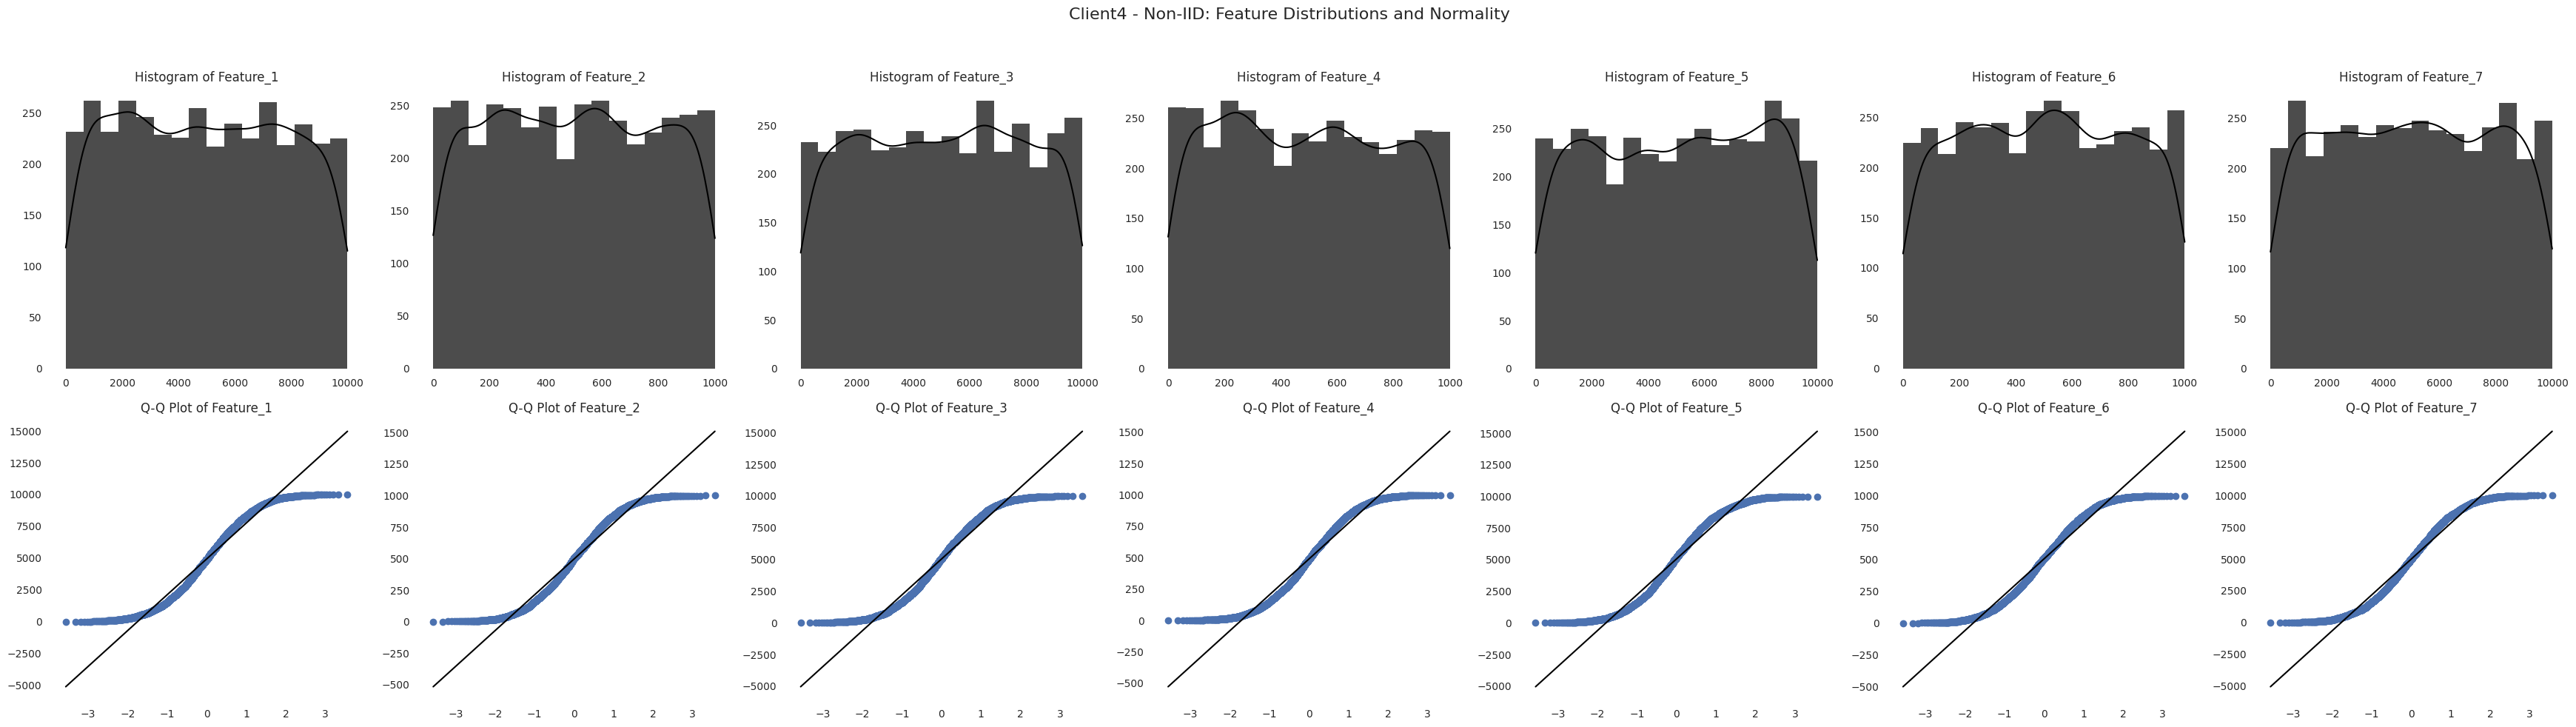

Shapiro-Wilk Test for Feature_1 in Client4 - Non-IID:
Statistic: 0.9543, p-value: 6.8769e-33
Feature_1 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_2 in Client4 - Non-IID:
Statistic: 0.9546, p-value: 8.6582e-33
Feature_2 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_3 in Client4 - Non-IID:
Statistic: 0.9549, p-value: 1.0596e-32
Feature_3 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_4 in Client4 - Non-IID:
Statistic: 0.9525, p-value: 2.0253e-33
Feature_4 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_5 in Client4 - Non-IID:
Statistic: 0.9519, p-value: 1.3590e-33
Feature_5 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_6 in Client4 - Non-IID:
Statistic: 0.9575, p-value: 6.4644e-32
Feature_6 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_7 in Client4 - Non-IID:
Statistic: 0.955

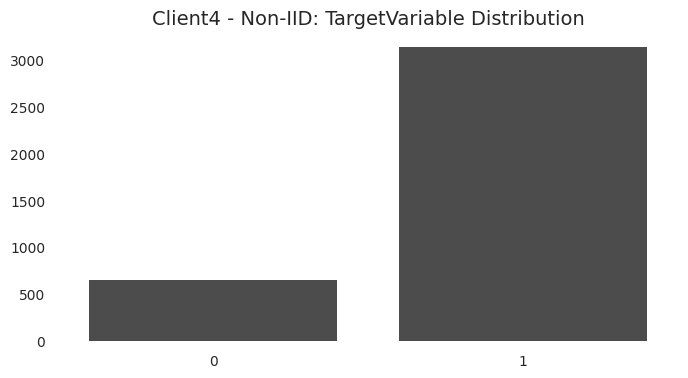

Distribution of TargetVariable in Client4 - Non-IID:
TargetVariable
1    3138
0     652
Name: count, dtype: int64
Proportion of class 0: 0.17
Proportion of class 1: 0.83



--- Analyzing Client 5 ---

Analyzing Client5 - IID dataset...


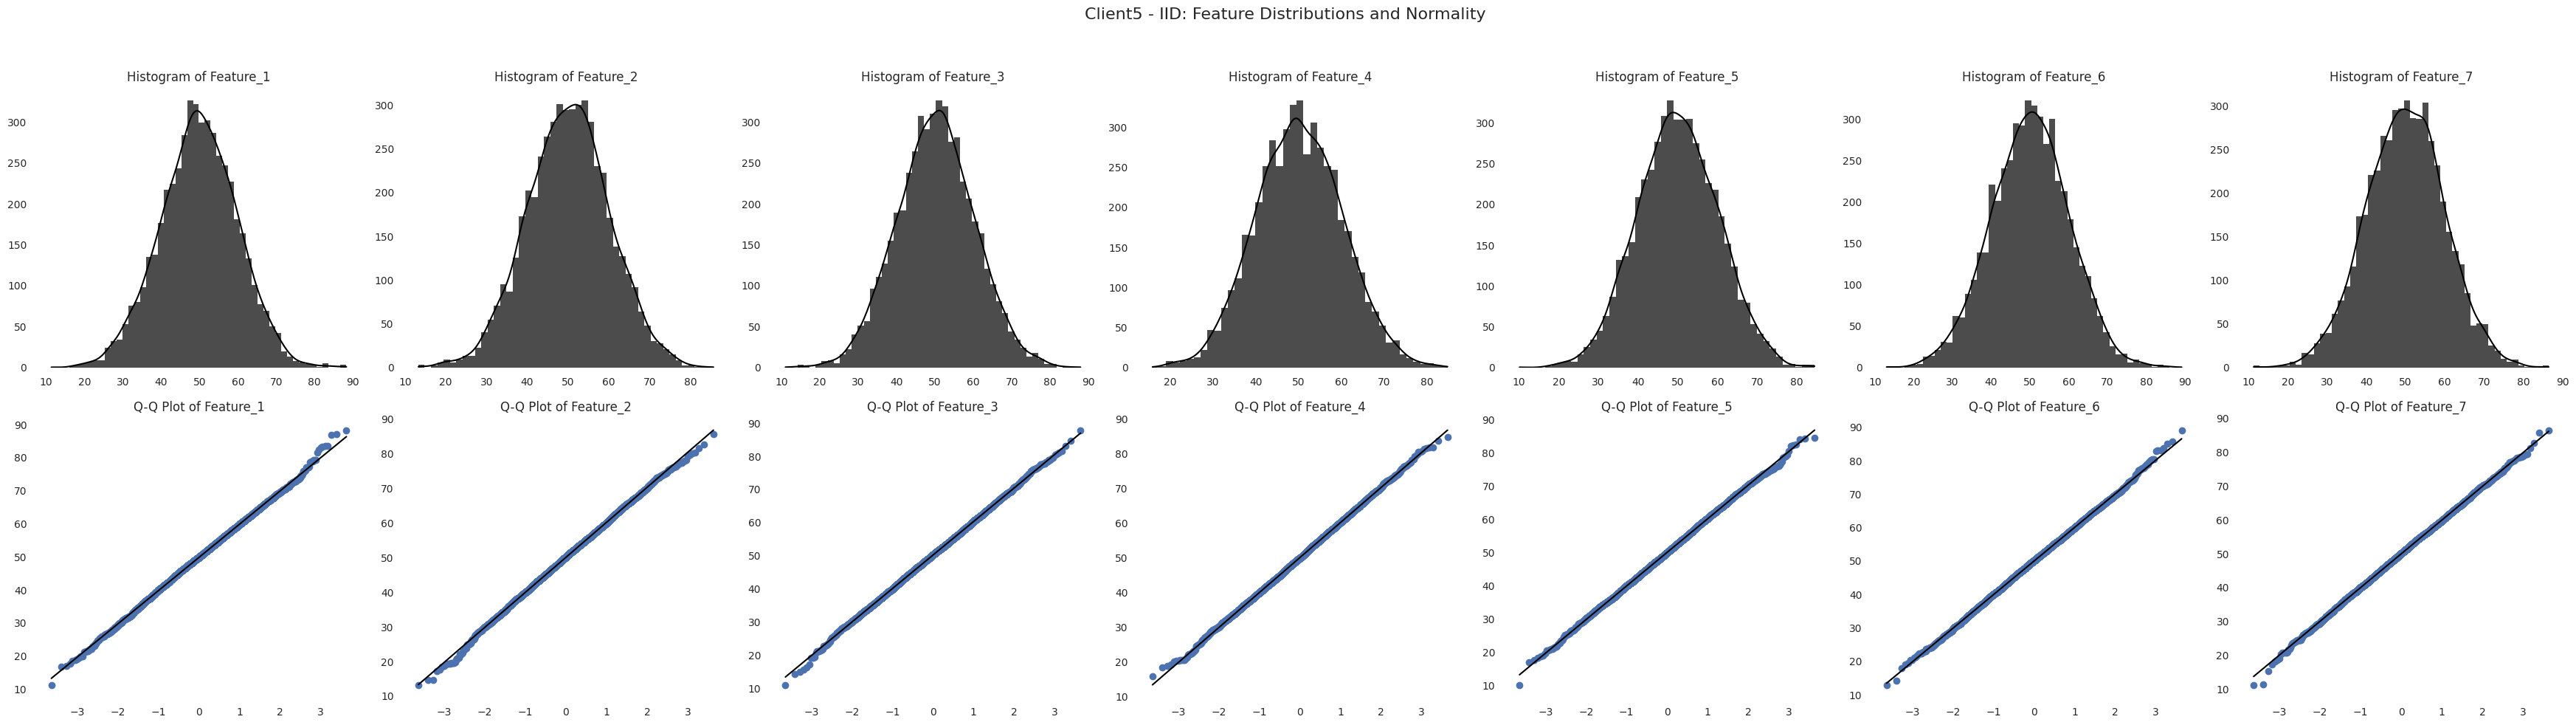

Shapiro-Wilk Test for Feature_1 in Client5 - IID:
Statistic: 0.9994, p-value: 1.3802e-01
Feature_1 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_2 in Client5 - IID:
Statistic: 0.9995, p-value: 2.7980e-01
Feature_2 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_3 in Client5 - IID:
Statistic: 0.9998, p-value: 9.5275e-01
Feature_3 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_4 in Client5 - IID:
Statistic: 0.9997, p-value: 6.9916e-01
Feature_4 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_5 in Client5 - IID:
Statistic: 0.9997, p-value: 7.0031e-01
Feature_5 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_6 in Client5 - IID:
Statistic: 0.9997, p-value: 7.1557e-01
Feature_6 follows a normal distribution (fail to reject H0)


Shapiro-Wilk Test for Feature_7 in Client5 - IID:
Statistic: 0.9997, p-value: 7.5901e-01
Featu

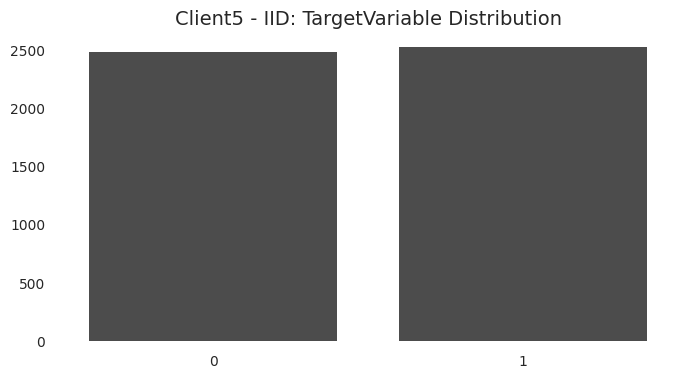

Distribution of TargetVariable in Client5 - IID:
TargetVariable
1    2520
0    2480
Name: count, dtype: int64
Proportion of class 0: 0.50
Proportion of class 1: 0.50


Analyzing Client5 - Non-IID dataset...


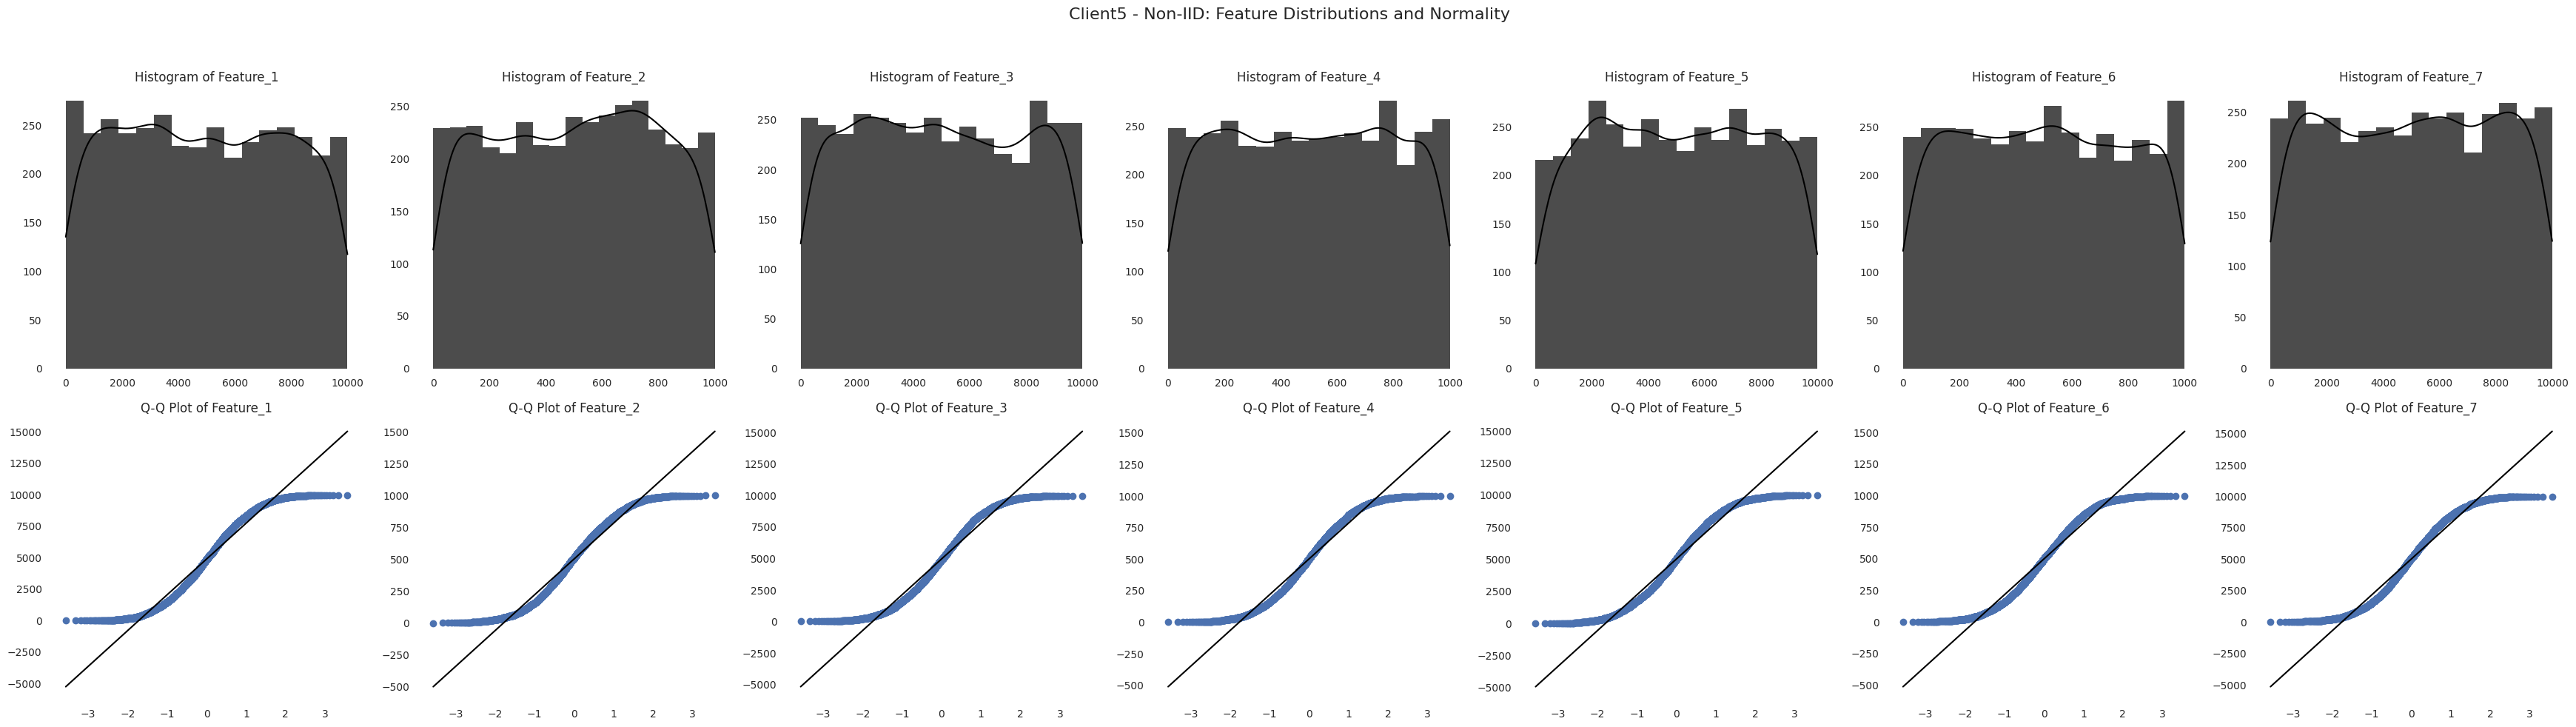

Shapiro-Wilk Test for Feature_1 in Client5 - Non-IID:
Statistic: 0.9540, p-value: 2.8360e-33
Feature_1 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_2 in Client5 - Non-IID:
Statistic: 0.9563, p-value: 1.4146e-32
Feature_2 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_3 in Client5 - Non-IID:
Statistic: 0.9532, p-value: 1.7045e-33
Feature_3 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_4 in Client5 - Non-IID:
Statistic: 0.9538, p-value: 2.5998e-33
Feature_4 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_5 in Client5 - Non-IID:
Statistic: 0.9565, p-value: 1.6134e-32
Feature_5 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_6 in Client5 - Non-IID:
Statistic: 0.9548, p-value: 4.9175e-33
Feature_6 does not follow a normal distribution (reject H0)


Shapiro-Wilk Test for Feature_7 in Client5 - Non-IID:
Statistic: 0.952

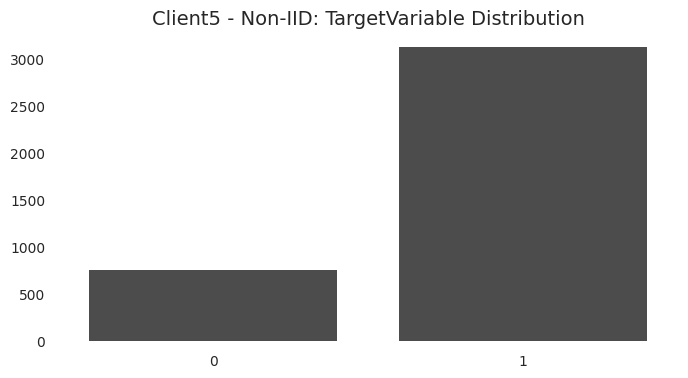

Distribution of TargetVariable in Client5 - Non-IID:
TargetVariable
1    3117
0     748
Name: count, dtype: int64
Proportion of class 0: 0.19
Proportion of class 1: 0.81




In [5]:
# Function to apply Tufte's style to the plots
# This function configures seaborn and matplotlib settings to follow Edward Tufte's minimalist design principles
def tufte_style():
    sns.set(style="whitegrid")
    plt.rcParams.update({
        'axes.edgecolor': 'black',
        'axes.linewidth': 0.8,
        'grid.color': 'white',
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.spines.bottom': False,
        'xtick.bottom': False,
        'ytick.left': False,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10
    })

# Apply Tufte style to all the plots that follow
tufte_style()

# Function to analyze the distribution and normality of features in a dataset
# This function generates histograms and Q-Q plots for each feature to visually assess their distribution
def analyze_distribution(df, dataset_name):
    print(f"Analyzing {dataset_name} dataset...")
    
    # Exclude the 'TargetVariable' column and get the feature names
    features = df.columns[1:]  # Skip the first column ('TargetVariable')
    
    # Set up the figure with 2 rows (histograms and Q-Q plots) and as many columns as there are features
    fig, axes = plt.subplots(nrows=2, ncols=len(features), figsize=(5 * len(features), 10))
    
    # Loop through each feature and generate the corresponding plots
    for i, feature in enumerate(features):
        # Generate and plot a histogram for the feature
        sns.histplot(df[feature], kde=True, ax=axes[0, i], color="black", edgecolor="none", alpha=0.7)
        axes[0, i].set_title(f'Histogram of {feature}', fontsize=12)
        axes[0, i].set_xlabel('')
        axes[0, i].set_ylabel('')
        
        # Generate and plot a Q-Q plot for the feature to assess normality
        stats.probplot(df[feature], dist="norm", plot=axes[1, i])
        axes[1, i].get_lines()[1].set_color('black')
        axes[1, i].set_title(f'Q-Q Plot of {feature}', fontsize=12)
        axes[1, i].set_xlabel('')
        axes[1, i].set_ylabel('')

    # Adjust layout to fit the title and the plots nicely
    fig.suptitle(f'{dataset_name}: Feature Distributions and Normality', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Perform and print results of the Shapiro-Wilk Test for normality on each feature
    for feature in features:
        stat, p = stats.shapiro(df[feature])
        print(f'Shapiro-Wilk Test for {feature} in {dataset_name}:')
        print(f'Statistic: {stat:.4f}, p-value: {p:.4e}')
        if p > 0.05:
            print(f'{feature} follows a normal distribution (fail to reject H0)')
        else:
            print(f'{feature} does not follow a normal distribution (reject H0)')
        print('\n')

# Function to analyze and plot the distribution of the TargetVariable
# This function generates a count plot for the target variable and prints its distribution
def analyze_target_variable(df, dataset_name):
    plt.figure(figsize=(8, 4))
    
    # Generate and plot a count plot for the TargetVariable
    sns.countplot(x='TargetVariable', data=df, color="black", edgecolor="none", alpha=0.7)
    plt.title(f'{dataset_name}: TargetVariable Distribution', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    
    # Print the counts and proportions of each class in the TargetVariable
    counts = df['TargetVariable'].value_counts()
    print(f'Distribution of TargetVariable in {dataset_name}:')
    print(counts)
    print(f'Proportion of class 0: {counts[0] / len(df):.2f}')
    print(f'Proportion of class 1: {counts[1] / len(df):.2f}')
    print('\n')

# Loop to analyze both IID and non-IID datasets for each client
for i in range(1, 6):  # Assuming 5 clients
    print(f"\n--- Analyzing Client {i} ---\n")
    
    # Paths to the IID and non-IID datasets for each client
    iid_dataset_path = f'{base_path}/client{i}/data{i}_iid.csv'
    non_iid_dataset_path = f'{base_path}/client{i}/data{i}_nonIID.csv'
    
    # Load the IID and non-IID datasets into DataFrames
    df_iid = pd.read_csv(iid_dataset_path)
    df_non_iid = pd.read_csv(non_iid_dataset_path)
    
    # Analyze the IID dataset: feature distributions and target variable
    analyze_distribution(df_iid, f"Client{i} - IID")
    analyze_target_variable(df_iid, f"Client{i} - IID")
    
    # Analyze the non-IID dataset: feature distributions and target variable
    analyze_distribution(df_non_iid, f"Client{i} - Non-IID")
    analyze_target_variable(df_non_iid, f"Client{i} - Non-IID")


# Summary of Key Functions

## 1. `generate_iid_normal_dataset(num_rows, mean=50, std_dev=10)`

**Purpose:**  
Generates an IID (Independent and Identically Distributed) dataset with feature values that follow a normal distribution.

**Inputs:**
- `num_rows`: Number of rows (samples) in the dataset.
- `mean`: The mean of the normal distribution for feature values.
- `std_dev`: The standard deviation of the normal distribution for feature values.

**Output:**  
A pandas DataFrame with a balanced target variable and normally distributed features.

---

## 2. `generate_non_iid_dataset(num_rows, imbalance_ratio=0.7)`

**Purpose:**  
Generates a non-IID dataset with class imbalance and increased variability using Faker.

**Inputs:**
- `num_rows`: Number of rows (samples) in the dataset.
- `imbalance_ratio`: The proportion of class 0 in the dataset (e.g., 0.7 means 70% of the samples belong to class 0).

**Output:**  
A pandas DataFrame with an imbalanced target variable and feature values generated with variability.

---

## 3. `tufte_style()`

**Purpose:**  
Applies Edward Tufte's minimalist design principles to Seaborn and Matplotlib plots.

**Inputs:**  
None.

**Output:**  
Configures the plotting environment to use a minimalist, gridless style.

---

## 4. `analyze_distribution(df, dataset_name)`

**Purpose:**  
Analyzes and visualizes the distribution and normality of features in a dataset.

**Inputs:**
- `df`: The dataset to analyze (pandas DataFrame).
- `dataset_name`: The name of the dataset, used for plot titles.

**Output:**  
Displays histograms and Q-Q plots for each feature, along with the results of the Shapiro-Wilk normality test.

---

## 5. `analyze_target_variable(df, dataset_name)`

**Purpose:**  
Analyzes and visualizes the distribution of the target variable in a dataset.

**Inputs:**
- `df`: The dataset to analyze (pandas DataFrame).
- `dataset_name`: The name of the dataset, used for plot titles.

**Output:**  
Displays a count plot for the target variable and prints the distribution proportions.

---

## 6. Main Loop for Dataset Generation and Analysis

**Purpose:**  
Generates both IID and non-IID datasets for multiple clients, then analyzes and visualizes these datasets.

**Process:**
- For each client (1 to 5):
  - Generates an IID dataset with a fixed number of rows and saves it as a CSV file.
  - Generates a non-IID dataset with a random number of rows and a random imbalance ratio, then saves it as a CSV file.
  - Analyzes and visualizes the feature distributions and target variable for both IID and non-IID datasets.

**Output:**  
Saved CSV files for each client’s IID and non-IID datasets, along with printed analysis and visualizations.


In [6]:
from datetime import datetime

# Print the current date and time
print("This workbook was last run on:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

This workbook was last run on: 2024-08-24 18:31:35
